# The Euler Spiral

In [8]:
%matplotlib inline
from scipy import *
from numpy import *
from scipy.integrate import quad
import sympy as sym
from bqplot import *
from pylab import *
import matplotlib.patches as patches
import bqplot.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, Latex, HTML, Math
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

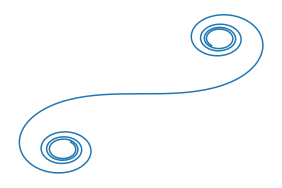

In [9]:
# attempt to make little, spineless, intro plot

# Euler Spiral
sarr = linspace(-7, 7, 300)
def xfunc(t):
    return cos(0.5*t**2)

def yfunc(t):
    return sin(0.5*t**2)

x = array([quad(xfunc, 0, s)[0] for s in sarr])
y = array([quad(yfunc, 0, s)[0] for s in sarr])

fig = figure(figsize=(4.8, 3.2))
out = plot(x,y)
ax = gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
for item in ax.spines.values():
    item.set_visible(False)

In [10]:
fig_layout = widgets.Layout(height = "550px", width = "550px")
fig_margin_dict = dict(top=30, bottom = 30, left = 20, right = 10)

## Planar Curves
Consider a parametric curve in the plane, with coordinates expressed as functions of arc length $s$ as: $x = g(s), y = h(s)$.

The *Fundamental Theorem of Plane Curves* says (in essence) that a plane curve is determined by its curvature, $\kappa(s)$.   That is, if we are given a starting point and a curvature function, then the entire curve is determined (technically, up to a "Euclidean motion," i.e. a rotation and a translation).

### Aside:  Proof of the above claim

(Feel free to jump to the end to see the equations actually used in the calculation below).

First, describe a curve in terms of intrinsic variables (*i.e.* unaffected by choice of coordinates or orientation): its arc length, $s$,  its curvature, $\kappa(s)$, and its *tangential angle*, $\psi(s)$.  Choose $s=0$ to be a location where $\psi(s) = 0$, and take the direction of the curve as the positive $x$ axis at that point.  In the figure below, the green line is the tangent to the 'arbitrary curve' (blue curve) at point P.

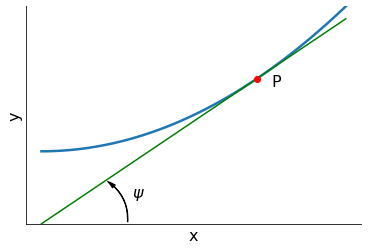

In [11]:
x = linspace(0, sqrt(2), 200)
y = x**2 + 1
plot(x,y, linewidth = 2.5)
plot(x, 2*x, 'g')
plot(1, 2, 'ro')
item = text(1.07, 1.9, 'P', fontsize=16)
psi = text(0.42, 0.37, r'$\psi$', fontsize=16)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color='k')
a1 = patches.FancyArrowPatch((0.4,0), (0.3, 0.6), connectionstyle="arc3, rad=.3", **kw)
ax = gca()
ax.add_patch(a1)
ax.axes.xaxis.set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticks([])
ylim([0, 3])
xlabel('x', fontsize=16)
ylabel('y', fontsize=16);


Clearly, $\frac{dy}{dx} =\tan \psi$, and we can define the curvature of the curve at $s$ as $\kappa(s) = \frac{d\psi(s)}{ds}$.  Further, since the incremental distance $$ds = \sqrt{dx^2 + dy^2} = \sqrt{1 + \left(\frac{dy}{dx}\right)^2}dx$$, we see that $\frac{ds}{dx} = \sqrt{1 + \left(\frac{dy}{dx}\right)^2} = \sqrt{1 + \tan^2 \psi} = \sec \psi$.  Thus, $\frac{dx}{ds} = \cos \psi$, and since $\frac{dy}{dx} = \frac{dy}{ds} \frac{ds}{dx} = \tan \psi$, we see that $\frac{dy}{ds} = \sin \psi$.

Let the curve in question have a parameterization in terms of arc length as:
$$x = g(s)$$
$$y = h(s)$$
and write
$$\frac{dx}{ds} = g'(s) \text{ and } \frac{dy}{ds} = h'(s)$$
Then we have the following **defining equations** for the curve:
$$\kappa(s) = \frac{d\psi(s)}{ds},$$
$$g'(s) = \cos \psi(s),$$
$$h'(s) = \sin \psi(s)$$

#### Plan of attack:
Given a $\kappa(s)$, we first find $\psi(s)$, then from that determine the parametric functions $g(s)$ and $h(s)$.  Integrating the first defining equation gives:
$$\psi(s) = \int \kappa(s) ds = \int_0^s \kappa(t)dt + \psi_0$$
Inserting this in to the second and third defining equations, we get
$$g'(s) = \cos  \left( \int_0^s \kappa(t)dt + \psi_0 \right) \text{ and } h'(s) = \sin  \left( \int_0^s \kappa(t)dt + \psi_0 \right)$$
resulting in the general solutions (showing constants of integration explicitly):
$$g(s) = \int_0^s \cos \left( \int_0^u \kappa(t) + \psi_0 \right) du + x_0,$$
and
$$h(s) = \int_0^s \sin \left( \int_0^u \kappa(t) + \psi_0 \right) du + y_0.$$

Now just a little housekeeping with some trigonometric identities to complete the proof.  Apply the identities
$$\cos(\theta + \phi) = \cos \theta \cos \phi - \sin \theta \sin \phi$$
$$\sin(\theta + \phi) = \sin \theta \cos \phi + \cos \theta \sin \phi$$
to the above general solutions.  Showing the details for $g(s)$ only, we have
$$g(s) = \int_0^s \cos \left( \int_0^u \kappa(t) + \psi_0 \right) du + x_0$$
$$= \int_0^s \cos \left( \int_0^u \kappa(t) dt \right) \cos \psi_0 du - \int_0^s \sin \left( \int_0^u \kappa(t) dt  \right) \sin \psi_0 du+ x_0$$
$$ = \boldsymbol{\cos \psi_0 } \int_0^s \cos \left( \int_0^u \kappa(t)  dt \right) du - \boldsymbol{\sin \psi_0} \int_0^s \sin \left( \int_0^u \kappa(t)  dt \right) du + x_0$$
Similarly, for $h(s)$:
$$ h(s) = \boldsymbol{\cos \psi_0 } \int_0^s \sin \left( \int_0^u \kappa(t)  dt \right) du + \boldsymbol{\sin \psi_0} \int_0^s \cos \left( \int_0^u \kappa(t)  dt \right) du + y_0$$
Rewriting in matrix form:
$$\begin{pmatrix}
g(s)\\h(s)
\end{pmatrix} = \begin{pmatrix} \cos \psi_0 & -\sin \psi_0 \\ \sin \psi_0 & \cos \psi_0 \end{pmatrix}
\begin{pmatrix} \int_0^s \cos \left( \int_0^u \kappa(t)  dt \right) du\\ \int_0^s \sin \left( \int_0^u \kappa(t)  dt \right) du \end{pmatrix} +
\begin{pmatrix} x_0 \\ y_0 \end{pmatrix},$$
from which form it is clear that the arbitrary constants of integration can only cause a rotation ($\psi_0$) or a translation ($x_0$ and $y_0$) of the final result.  The curve is then uniquely determined by the parametric equations
$$\boldsymbol{x} = g(s) = \int_0^s \cos \left( \int_0^u \kappa(t)  dt \right) du,$$
$$\boldsymbol{y} = h(s) = \int_0^s \sin \left( \int_0^u \kappa(t)  dt \right) du,$$
up to rotations and translations.  These two equations are used below explicitly to find the curves: the inner integral (over $t$) is evaluated symbolically and then converted to a numerical function; the outer integral is evaluated numerically. 

## Curve Explorer

Use the controls below the plot to explore different aspects of curves as determined by a choice of curvature function.

### Rules

Enter a curvature function in the designated box as a function of the parameter $t$.  Use functions that have antiderivatives, as this is integrated *symbolically* rather than numerically.  If you get an error message in a pink box, consider reducing the bounds being considered -- the numerical integration can become unstable.

### Initial curve

$\kappa = \cos t - t \sin t \Rightarrow  \int_0^u \kappa(t)  dt = f(u) = u \cos u$

### Chaise lounge

Set $\kappa = t^2$ (enter "t**2").  Works better with smaller range, -6 to 6.


### <font color='blue'>Euler Spiral</font>
   
   Set $\kappa = t$.  Note:  This makes the curvature change *linearly* with distance along the curve.

In [12]:
t = sym.Symbol('t')

def set_function(strFunc):
    try:
        f = parse_expr(strFunc)
    except (TokenError, TypeError):
        print("malformed function")
        return None
    return   f

# initial conditions
low = -12
high = 12
nPts = 600
strFunc = "cos(t) - t*sin(t)"

# set curvature function:
kappa = set_function(strFunc)

f = lambdify(t, kappa.integrate(t), 'numpy')

s_arr = linspace(-12, 12, 600)

def xfunc(t):
    return cos(f(t))

def yfunc(t):
    return sin(f(t))


x = array([quad(xfunc, 0, s)[0] for s in s_arr])
y = array([quad(yfunc, 0, s)[0] for s in s_arr])


# Main figure
main_fig = plt.figure(title="", layout = fig_layout, fig_margin = fig_margin_dict)
function_curve = plt.plot(x, y)
s_point = plt.plot([0], [0], colors = ['red'], marker = 'circle')

# title for main figure
sym_func = sym.latex(kappa)
label_layout = widgets.Layout(display='flex', justify_content='center', width = "70%", 
                              align_items = 'center', border = 'none')
label = widgets.Label(r"$\kappa(t)) =  {}$".format(sym.latex(1+x**2)), layout = label_layout)
title_format = "<h2><font color='blue'>$\kappa(t) = {}$</font></h2>"
title_label = widgets.HTMLMath(title_format.format(sym_func),
                              layout = label_layout)

# s point control
point_label = widgets.Label("Arc length s = ")
point_slider = widgets.FloatSlider(value = 0.0, min = low, max = high, step = 0.01, 
                                  readout = True, readout_format = '.2f', continuous_update = True)
point_box = widgets.HBox([point_label, point_slider])

# function entry
entry_layout = widgets.Layout(width = '150px')
func_label = widgets.Label("Enter curvature function: ")
func_entry = widgets.Text(strFunc, continuous_update = False, layout = entry_layout)
func_box = widgets.HBox([func_label, func_entry])

# domain entry
dom_layout = widgets.Layout(width = '75px')
dom_label = widgets.Label("Enter domain: ")
dom_low = widgets.FloatText(value = low, layout = dom_layout)
dom_high = widgets.FloatText(value = high, layout = dom_layout)
nPts_label = widgets.Label("  number of points: ")
nPts_entry = widgets.IntText(value = nPts, layout = dom_layout)
dom_box = widgets.HBox([dom_label, dom_low, dom_high, nPts_label, nPts_entry])

# callback functions
def update_plot(change):
    global f
    strFunc = func_entry.value
    kappa = set_function(strFunc)
    title_label.value = title_format.format(sym.latex(kappa))
    f = lambdify(t, kappa.integrate(t), 'numpy')
    
    low = dom_low.value
    high = dom_high.value
    nPts = nPts_entry.value
    point_slider.min = low
    point_slider.max = high
    point_slider.value = 0.0
    s_arr = linspace(low, high, nPts)
    x = array([quad(lambda t: cos(f(t)), 0, s, limit = 75)[0] for s in s_arr])
    y = array([quad(lambda t: sin(f(t)), 0, s, limit = 75)[0] for s in s_arr])
    function_curve.x = x
    function_curve.y = y
    s_point.x = [0] if low < 0 else [quad(lambda t: cos(f(t)), 0, low)[0]]
    s_point.y = [0]
    
    # if domain doesn't include s = 0:
    if low * high > 0:
        start = low if low > 0 else high
        s_point.x = [quad(lambda t: cos(f(t)), 0, start)[0]]
        s_point.y = [quad(lambda t: sin(f(t)), 0, start)[0]]
    # print(change['owner'], s_point.x, s_point.y)
    
# move red point around
def update_point(change):
    s = point_slider.value
    x = quad(xfunc, 0, s)[0]
    y = quad(yfunc, 0, s)[0]
    s_point.x = [x]
    s_point.y = [y]

# callbacks
for widget in [func_entry, nPts_entry, dom_low, dom_high]:
    widget.observe(update_plot, names = 'value')
    
point_slider.observe(update_point, names = 'value')
widgets.VBox([title_label, main_fig, point_box, func_box, dom_box])

## Brief History

According to my source, the first reference to this curve was by Jakob Bernoulli (the mathematical patriarch of that family) in 1694.  He had posed the question as to the shape that a thin beam must have so that when a weight was hung from the end of it, it would be straightened out flat.  He found the answer that the distance along the beam ($s$) times the radius of curvature at that point ($R = 1/\kappa$) must be equal to a positive constant.  That is, curvature is proportional to arc length -- the Euler Spiral.  Of course, Bernoulli was only interested in the curve up until the point at which it became vertical; it had no meaning for his problem behond that point.

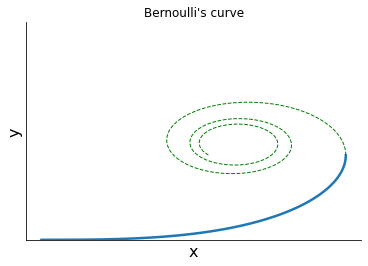

In [13]:
sarr = linspace(0, sqrt(pi), 200)
sarr2 = linspace(sqrt(pi), 6, 200)
y = x**2 + 1

f_spiral = lambda x: x**2/2

s_arr = linspace(-12, 12, 600)

def xspiral(t):
    return cos(f_spiral(t))

def yspiral(t):
    return sin(f_spiral(t))


x = array([quad(xspiral, 0, s)[0] for s in sarr])
y = array([quad(yspiral, 0, s)[0] for s in sarr])
x2 = array([quad(xspiral, 0, s)[0] for s in sarr2])
y2 = array([quad(yspiral, 0, s)[0] for s in sarr2])
plot(x,y, linewidth = 2.5)
plot(x2,y2, 'g--',linewidth = 1, )
title("Bernoulli's curve")
#item = text(1.07, 1.9, 'P', fontsize=16)

ax = gca()

ax.axes.xaxis.set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.yaxis.set_ticks([])
ylim([0, 2])
xlabel('x', fontsize=16)
ylabel('y', fontsize=16);

Euler himself took up the problem in 1744.  Not only did he derive the above result (which Bernoulli had not), he worked out the parametric equations for the curve (using modern notation):
$$x(s) = \int_0^s \cos \frac{s^2}{2a^2} du$$
and 
$$y(s) = \int_0^s \sin \frac{s^2}{2a^2} du$$
Euler recognized that these integrals could not be evaluated in closed form, but worked out term-by-term integration of the series expansions in order to evaluate them.  He then posed the question of locating the two limit points of the spiral, namely:
$$ x = \pm \int_0^{\infty} \cos \frac{u^2}{2a^2} du$$
$$ y = \pm \int_0^{\infty} \sin \frac{u^2}{2a^2} du$$

Euler answered his own question in 1781:

$$ x = \pm \frac{a \sqrt{\pi}}{2} \text{ and } x = \pm \frac{a \sqrt{\pi}}{2} $$

In 1814, the components of the spiral resurfaced in the work of Augustin Fresnel, who found that the intensity of light in a diffraction pattern (within certain approximations) was:
$$I_v = \left[ \int_0^v \cos \frac{1}{2} \pi t^2 dt \right]^2 +\left[  \int_0^v \sin \frac{1}{2} \pi t^2 dt \right ]^2$$

These component integrals then became known as *Fresnel Integrals*.  They are also called *Cornu Integrals* after some related work by the French mathematician Alfred Cornu in 1874.

## Application:  Train Tracks

Yes, train tracks.  What is the best sort of curve to connect to straight segments of train tracks?  Arcs of circles are used in toy train sets, but in the real world, this creates some discomfort.  Imagine travelling at speed $v$ along a straight segment.  As soon as the train hit the circular segment, the centripetal acceleration would jump from 0 to $\frac{v^2}{r} = \kappa v^2$.  The resulting unpleasant experience is apparently known as a 'jerk'.  To avoid this, in 1881 a Mr. Holbrook introduced the idea of using a curve whose curvature increased linearly with distance -- a piece of a Euler Spiral.  Upon entering such a curve, passengers would feel a linearly increasing acceleration instead of a sudden jerk.

In [14]:
%%html
<style>
div.input {
    display:none;
}
</style>

#### Implementation notes:

Of course, all numerical calculations done in all of these notebooks is done with a combination of ```numpy``` and ```scipy```.  These won't be mentioned again, as their use is **always** assumed.

```matplotlib``` is the most commonly used plotting package for Python, and is used here for inline plot because it has far more methods for making changes to its appearance: showing / not showing enclosing box, controlling how or whether tick marks are shown, *etc.*

```bqplot``` is a plotting package that makes interactive widget-like plots, and is used here to make the interactive plot

Originally, I attempted to do both integrals to generate a curve from a curvature function *numerically*, but this turned out to be slow.  So the inner integral (of the curvature function itself) is done symbolically using the ```sympy``` package.   ```sympy``` provides several useful tools:  ```from sympy.parsing.sympy_parser import parse_expr``` parses strings into symbolic expressions understood by ```sympy```.  Then, ```from sympy import lambdify``` converts the symbolic expression into a ```numpy``` numerical function!  Both handy and *much* faster than the numerical-only implementation.

Numerical integration is done using ```scipy.integrate.quad```.

Non-plotting interactive widgets are provided through ```ipywidgets```.